In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label, regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
import pydicom as pyd
from pydicom.pixel_data_handlers.util import apply_modality_lut
import os

In [3]:
for i in range(1, int(len(os.listdir("PAT025"))) + 1):
    path = str("PAT025\D0" + '{0:03}'.format(i) + ".dcm")
    img = pyd.dcmread(path)
    pixels = img.pixel_array
    hu = apply_modality_lut(pixels, img)
    if (i == 1):
        model = hu
    else:
        model = np.concatenate((model,hu))
model = model.reshape(len(os.listdir("PAT025")),512,512)
print(model.shape)

(221, 512, 512)


In [4]:
def display_image(slc):
    plt.pcolormesh(slc)
    plt.colorbar()

In [5]:
def label_mask(mask):
    mask_labeled = np.vectorize(label,signature="(n,m)->(n,m)")(mask)
    return mask_labeled

In [6]:
def fill_holes(mask):
    mask_filled = np.vectorize(ndi.binary_fill_holes, signature='(n,m)->(n,m)')(mask)
    return mask_filled

In [7]:
def top_3(slc):
    new_slc = np.zeros_like(slc)
    rps = regionprops(slc)
    areas = [r.area for r in rps]
    idxs = np.argsort(areas)[::-1]
    for i in idxs[:3]:
        new_slc[tuple(rps[i].coords.T)] = i + 1
    return new_slc

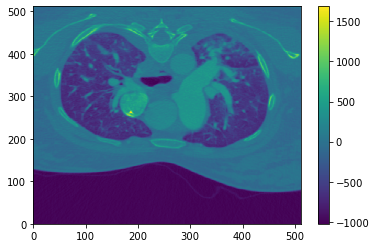

In [8]:
display_image(model[150])

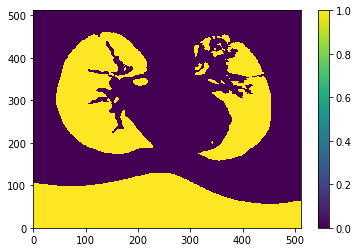

In [9]:
mask_test = model < -250
mask_test_filled = fill_holes(mask_test)
plt.pcolormesh(mask_test_filled[130])
plt.colorbar()

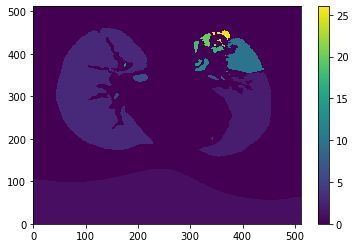

In [10]:
mask_test_labeled = label_mask(mask_test_filled)
plt.pcolormesh(mask_test_labeled[130])
plt.colorbar()

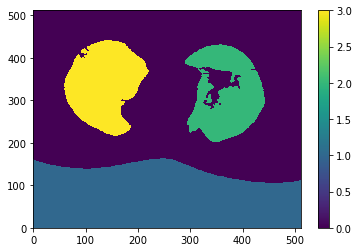

In [11]:
mask_test_top_3 = np.vectorize(top_3, signature='(n,m)->(n,m)')(mask_test_labeled)
plt.pcolormesh(mask_test_top_3[170])
plt.colorbar()